# Determine Fly Head Orientation


Goals:
- 90% accuracy in getting a fix
- attempt some CV methods in order to address this fix
- attempt a Neural Network that will address this issues

ToDo:
- could develop something where the best method is run when the fly angle algorithm fails... this would apply outside of the experiment...




In [2]:
# Import Libraries
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from lib.plotting import polarplot as polarplt# polar plotting module
from lib.parsing import basic_sections as bsc_sec # basic data parsing methods
from lib.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from lib.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from lib.led_convert import get_LED_angle_in_rad
from lib.plotting.flyviz import two_image_save_Otsu, two_image_save
# wrapping libraries:
from scipy import interpolate


/home/loganrower/project_repos/flyplot
Initialized Plotting Package
Initialized Parsing Package


height 1200
Angle Test!
Angle Value: 67.94377334440605
My Angle Value: 315.8875466888121
(759, 1047)
mask radius 570
height 1200
Angle Test!
Angle Value: 120.91954140260084
My Angle Value: 61.83908280520167
(279, 1053)
mask radius 570
(759, 1047)


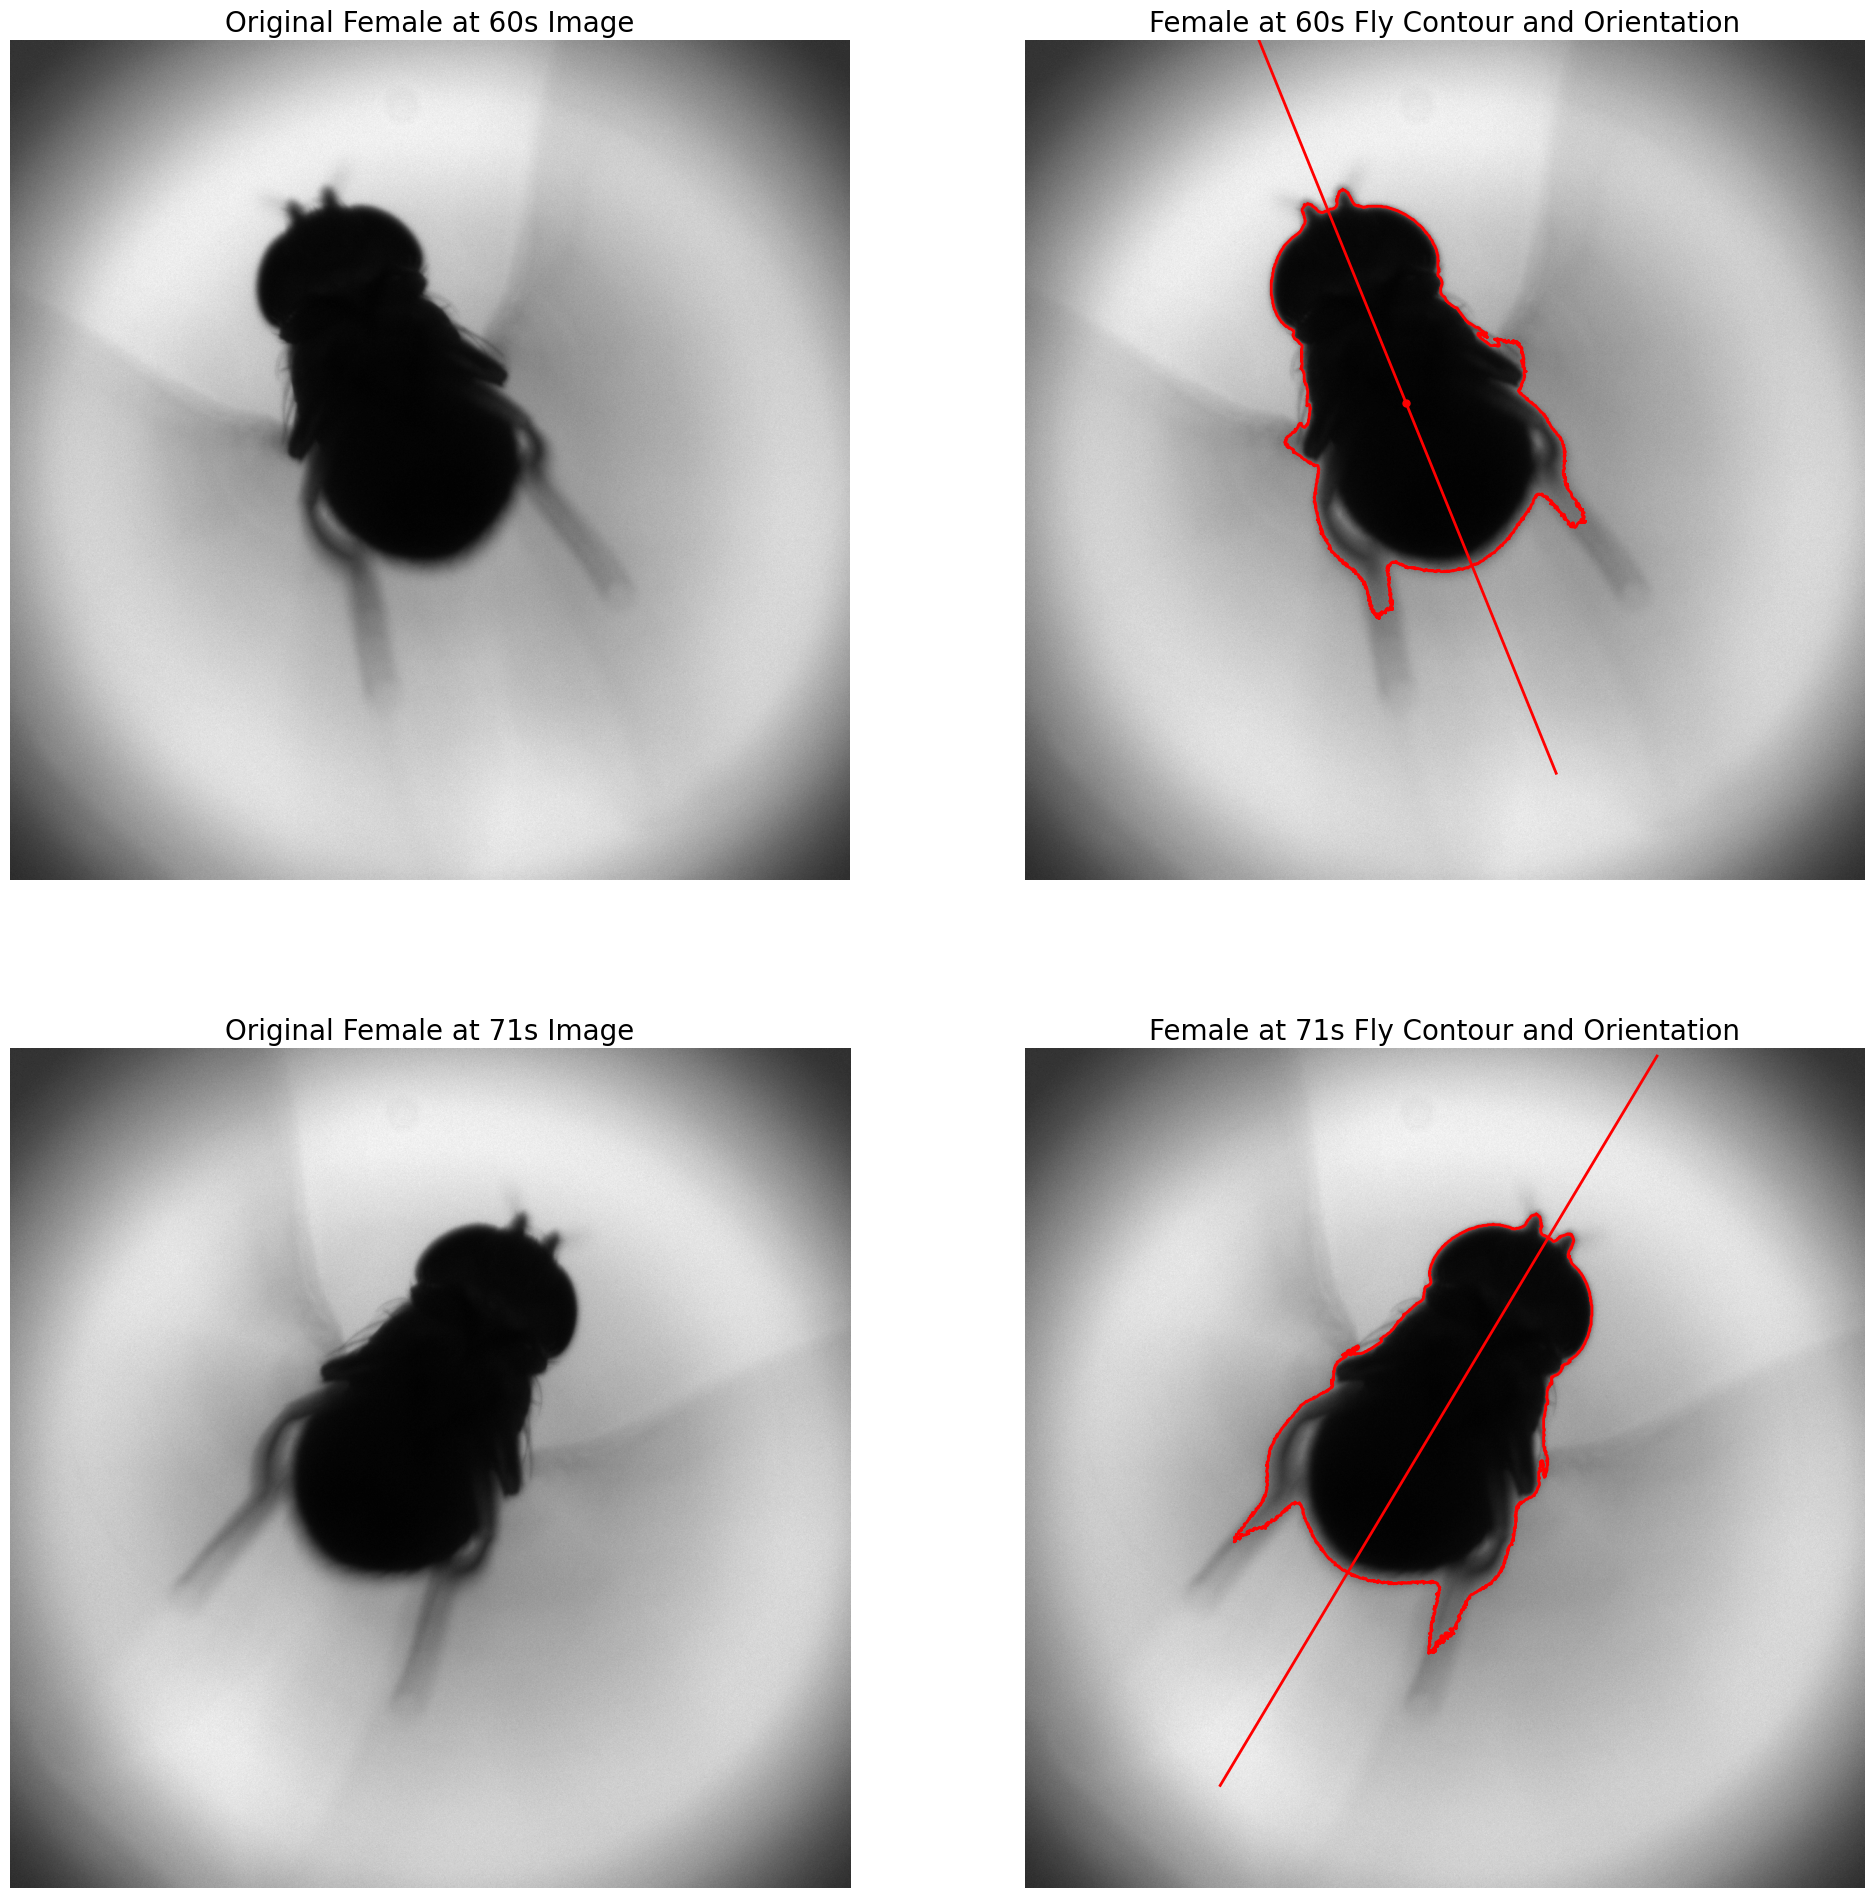

In [3]:
two_image_save_Otsu('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

height 1200
Angle Test!
Angle Value: 65.28706143794379
My Angle Value: 310.5741228758876
(749, 951)
mask radius 570
height 1200
Angle Test!
Angle Value: 119.1270765768938
My Angle Value: 58.254153153787584
(356, 959)
mask radius 570
(749, 951)


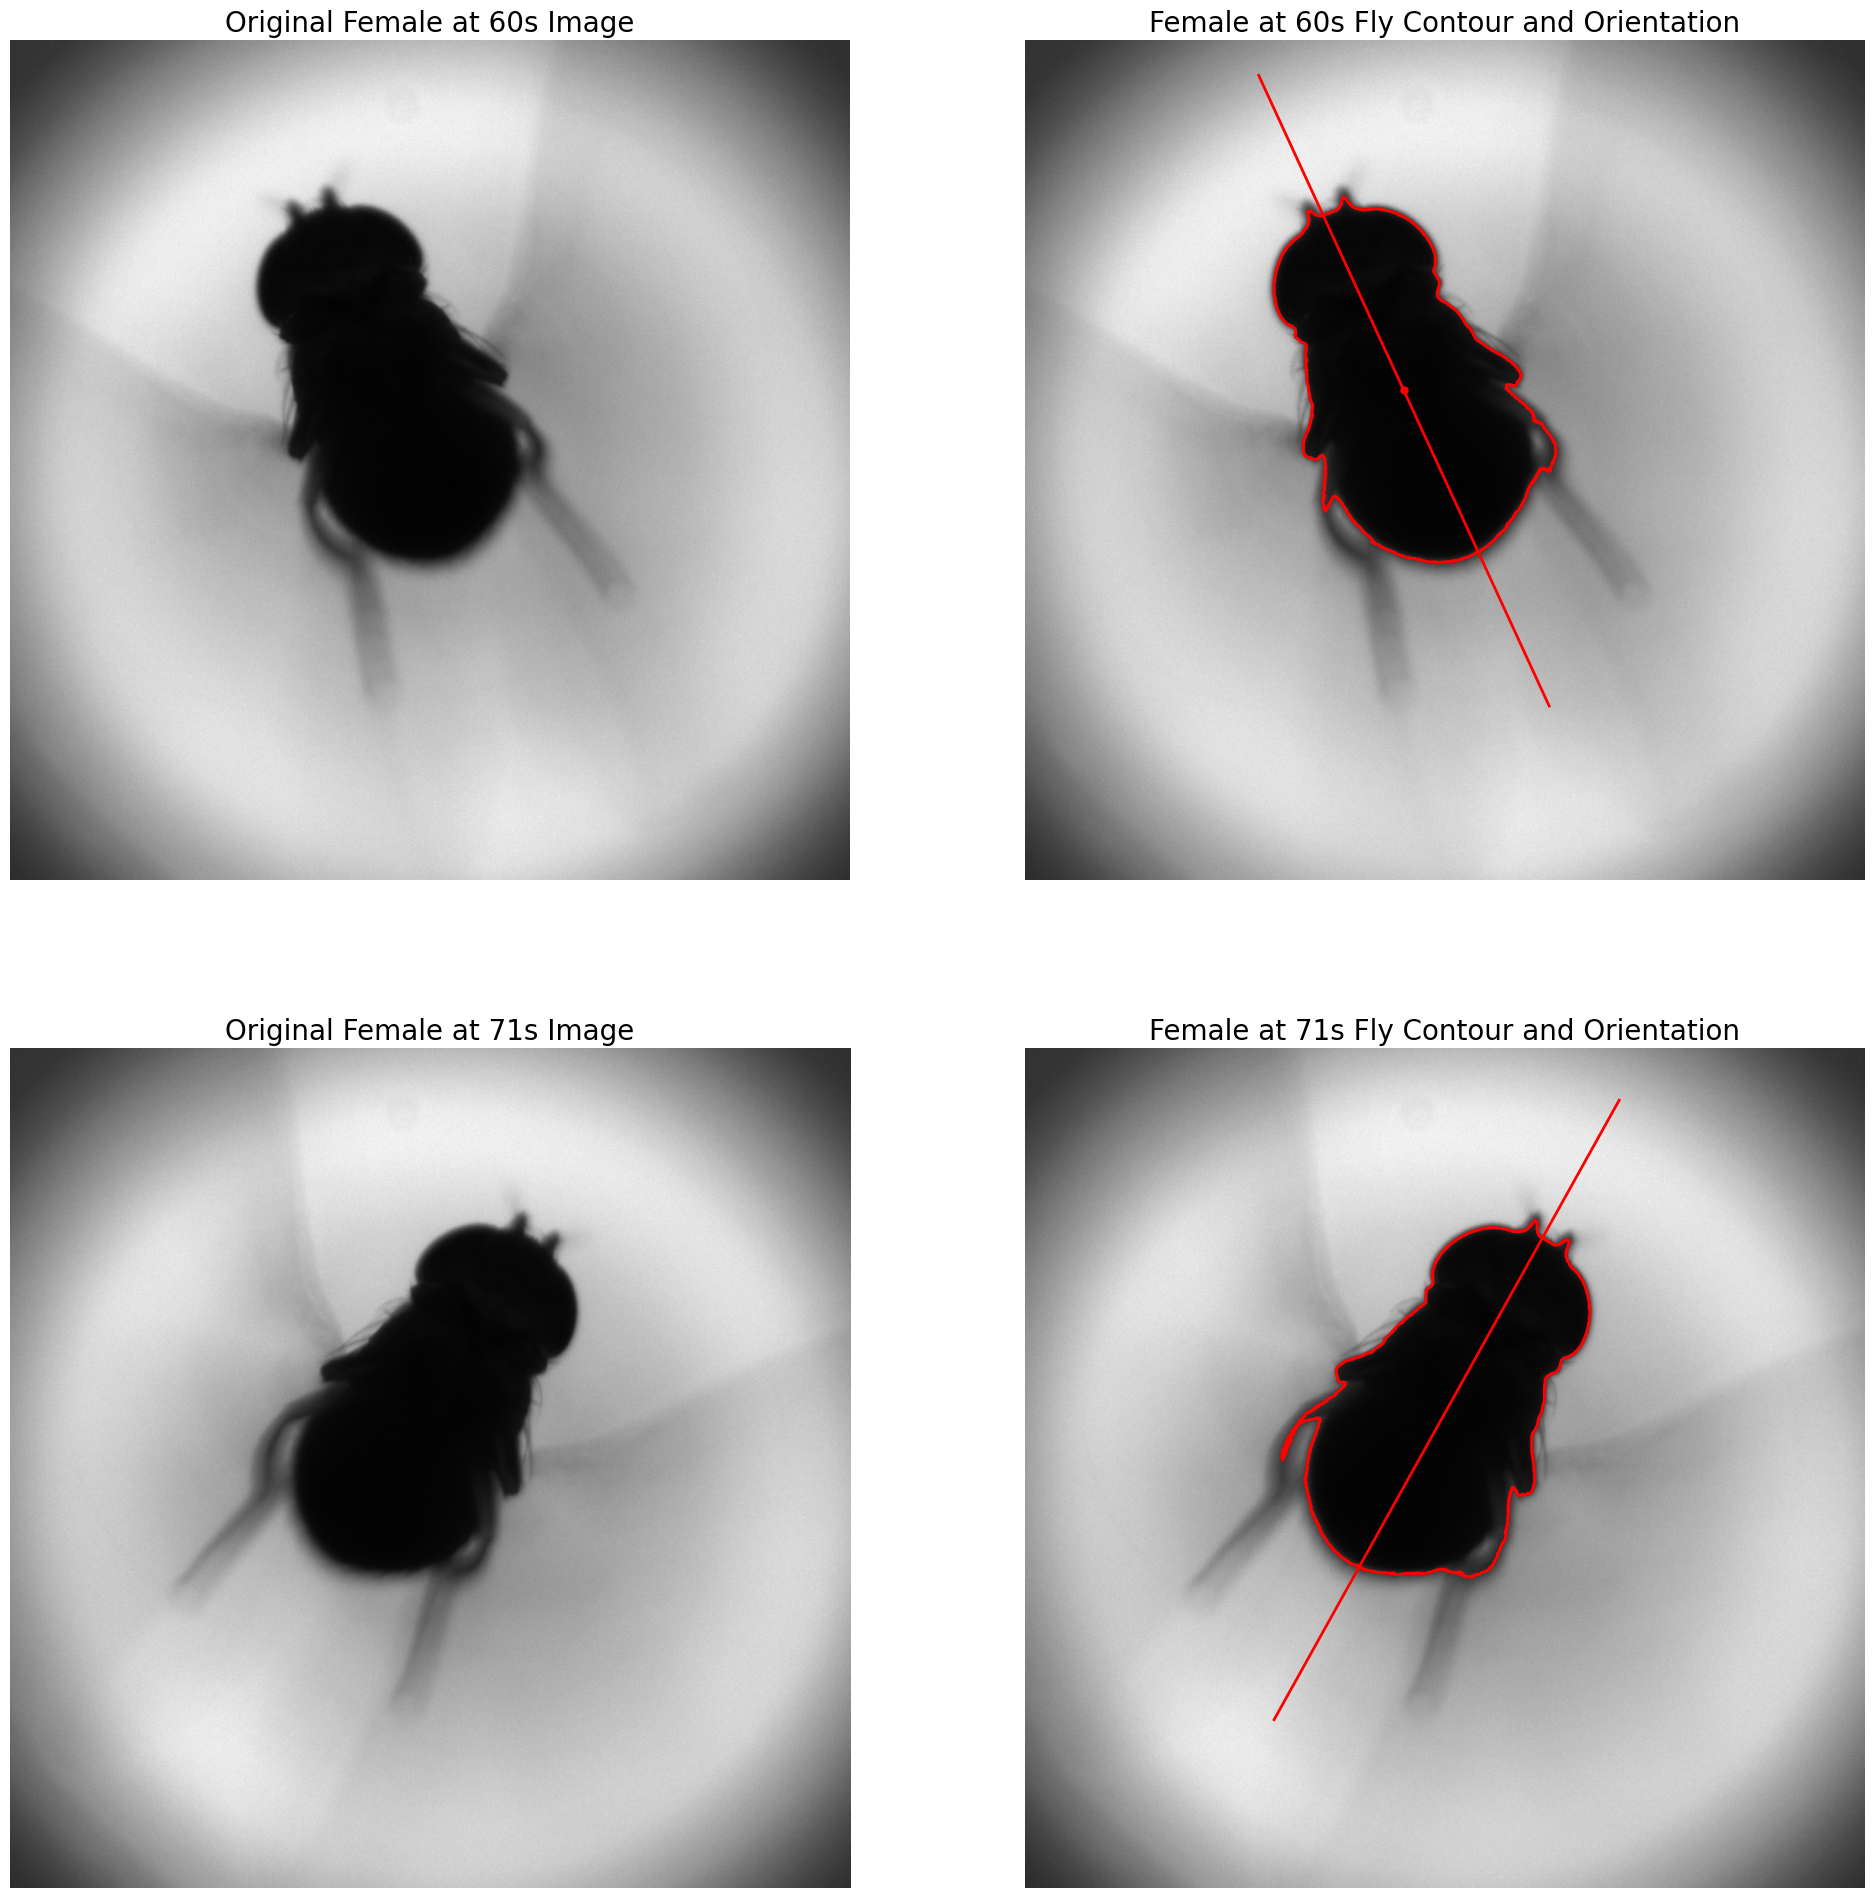

In [4]:
two_image_save('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

height 1200
Angle Test!
Angle Value: 69.76702275812531
My Angle Value: 319.5340455162506
(761, 898)
mask radius 570
height 1200
Angle Test!
Angle Value: 52.69167577430689
My Angle Value: 285.38335154861375
(874, 875)
mask radius 570
(761, 898)


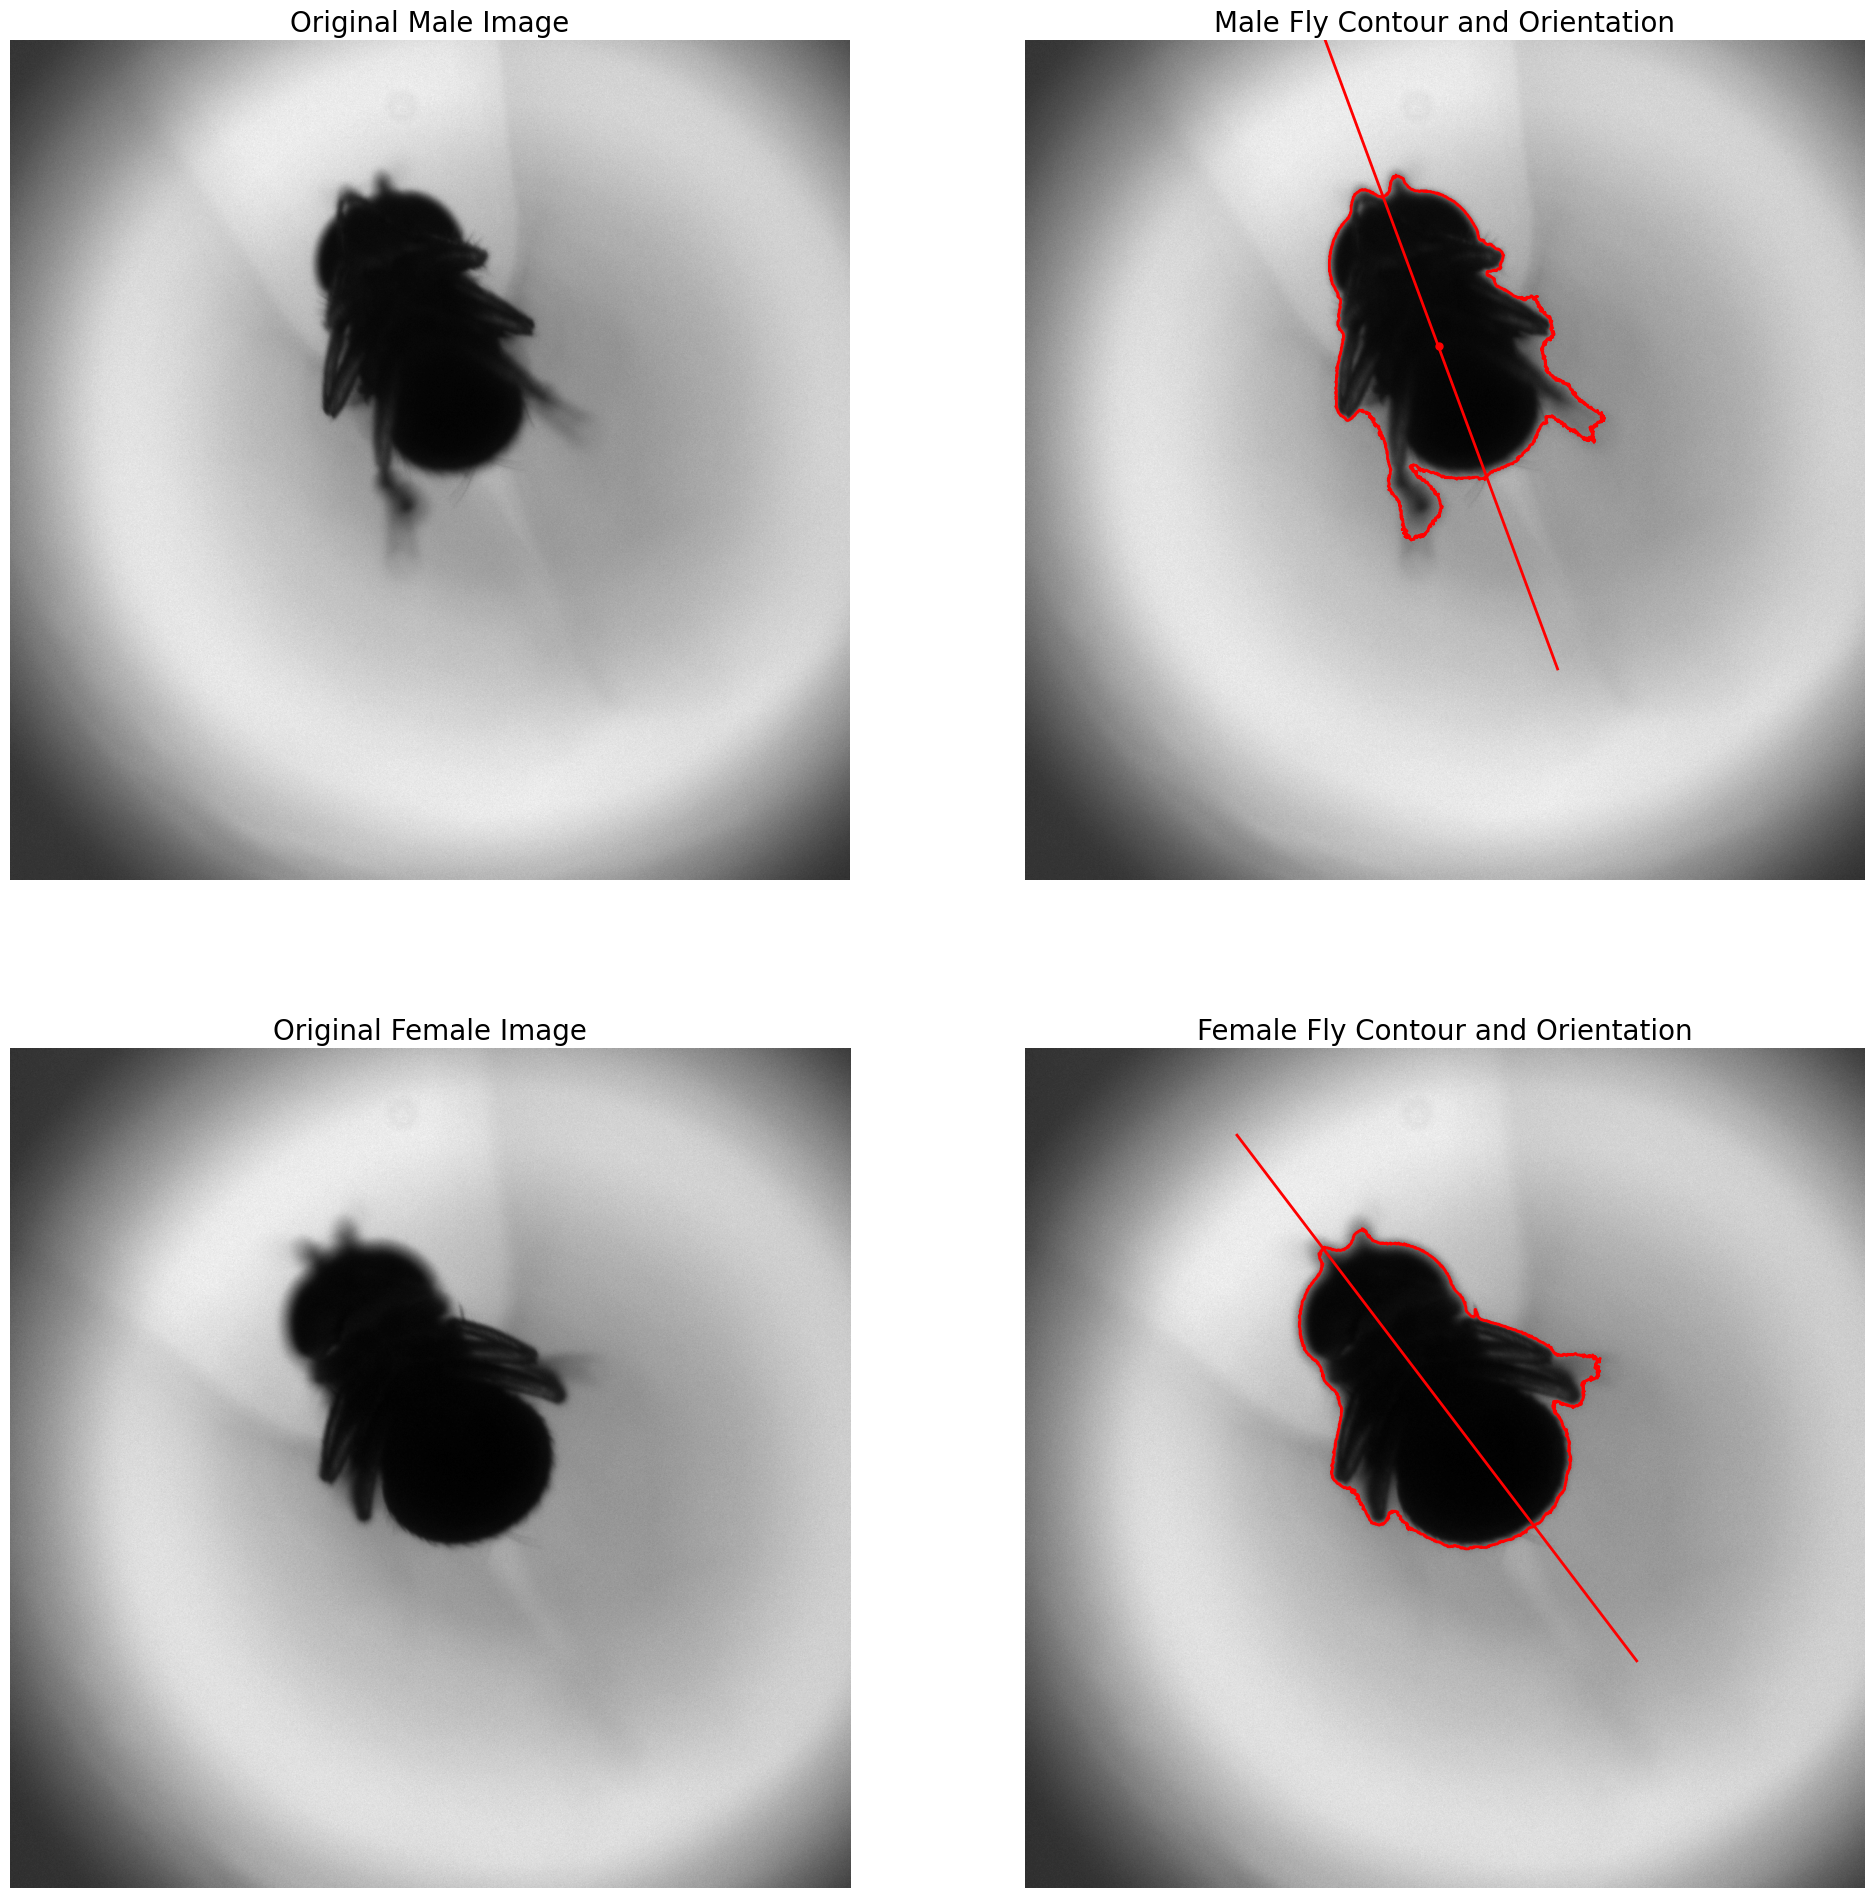

In [6]:
two_image_save_Otsu('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female", display=True)

height 1200
Angle Test!
Angle Value: 69.65016049260629
My Angle Value: 319.3003209852126
(735, 829)
mask radius 570
height 1200
Angle Test!
Angle Value: 53.813127143403584
My Angle Value: 287.6262542868072
(847, 856)
mask radius 570
(735, 829)


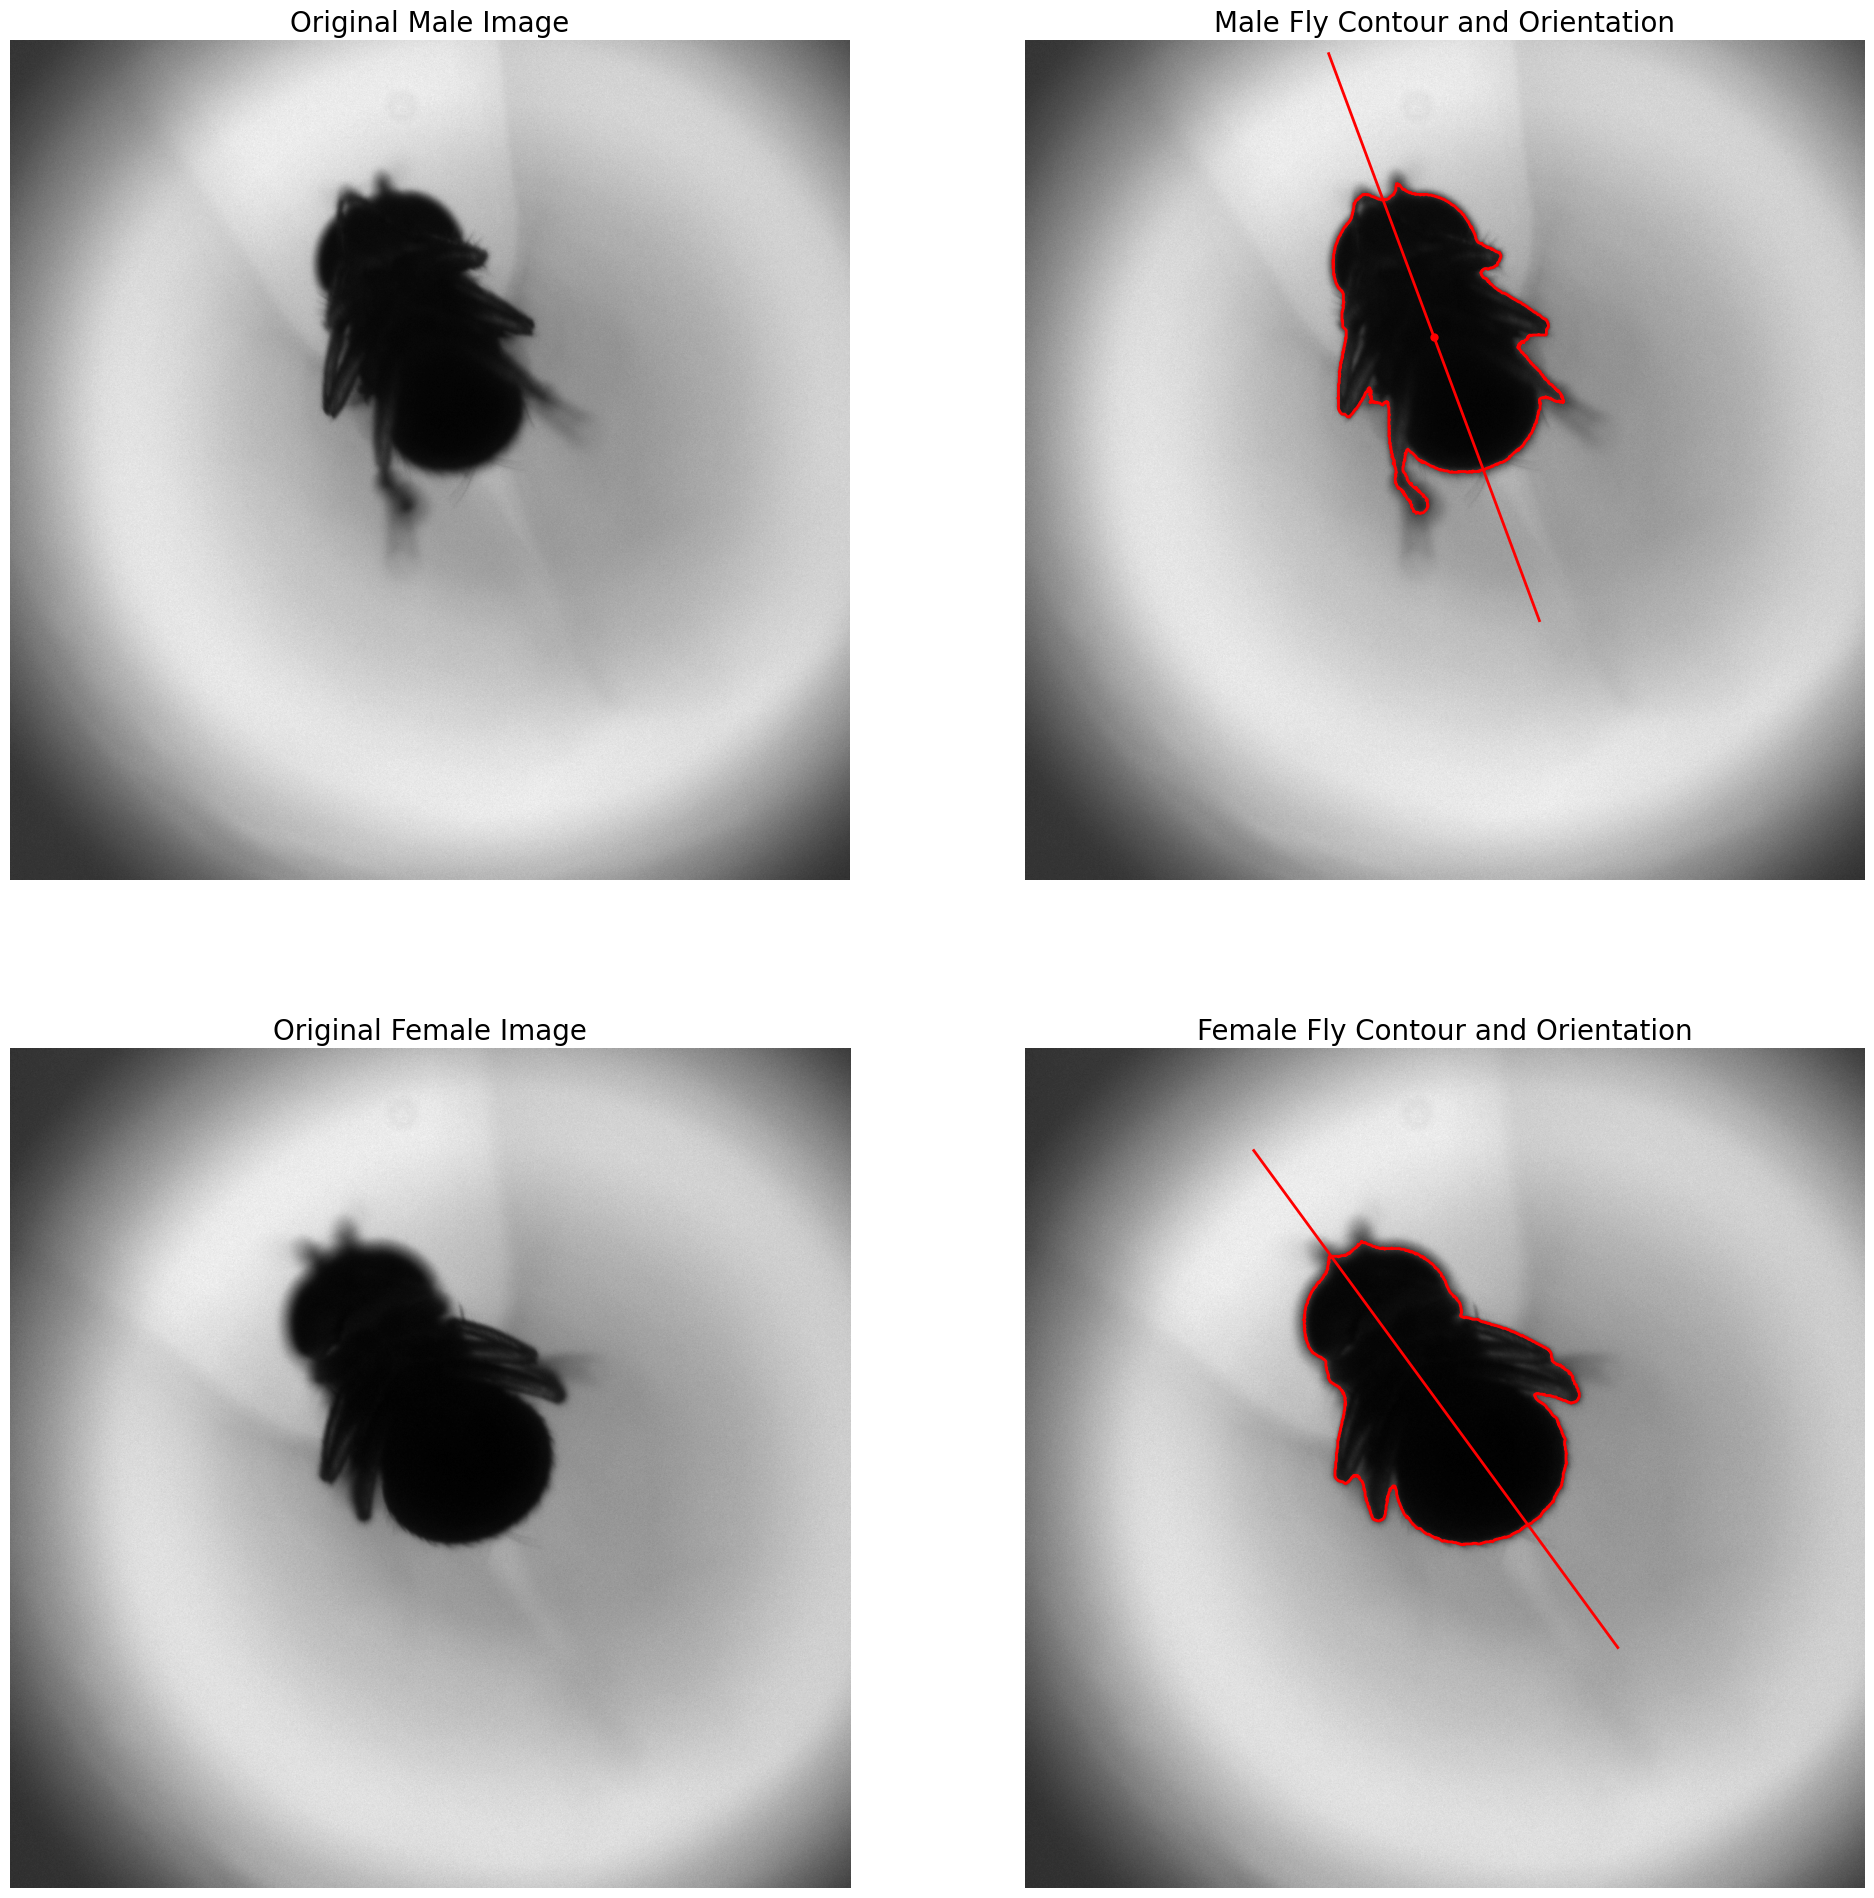

In [8]:
two_image_save('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female",display=True)

Method 1: Comparing to a fixed width with a specified curve based on training data...
- Point by point difference using a fixed width...
- Look for the max on both ends

OTHER:
- 

Mean contour method:
- generate training dataset this way as well


Dot product method looking at one side and then looking at the peaks where it indicates the direction towards the back...


Light weight NN method 